# Lab 1: Fetal Health

Eric Nguyen, George Aeillo, Arun Agarwal

### Import packages

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

### Read Data

In [2]:
df = pd.read_csv('fetal_health.csv')
X = df.drop(['fetal_health'], axis=1)
y = df['fetal_health']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Check Class Imbalance

In [4]:
{1.0: sum(df.fetal_health == 1.0), 2.0: sum(df.fetal_health == 2.0), 3.0: sum(df.fetal_health == 3.0)}

{1.0: 1655, 2.0: 295, 3.0: 176}

There are more 1.0 labels than 2.0 and 3.0 labels, so there is class imbalance.

### KNeighborsClassifier

In [5]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)

In [6]:
knn_acc_score = accuracy_score(y_test, y_pred_knn)

In [7]:
knn_score = f1_score(y_test, y_pred_knn, average='weighted')

### SVC

In [8]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)

In [9]:
svc_acc_score = accuracy_score(y_test, y_pred_svc)

In [10]:
svc_score = f1_score(y_test, y_pred_svc, average='weighted')

### RandomForest

In [11]:
clf = RandomForestClassifier(max_depth=25, random_state=0)
clf.fit(X_train, y_train)
y_pred_rf = clf.predict(X_test)

In [12]:
rf_acc_score = accuracy_score(y_test, y_pred_rf)

In [13]:
rf_score = f1_score(y_test, y_pred_rf, average='weighted')

### Feature Correlation

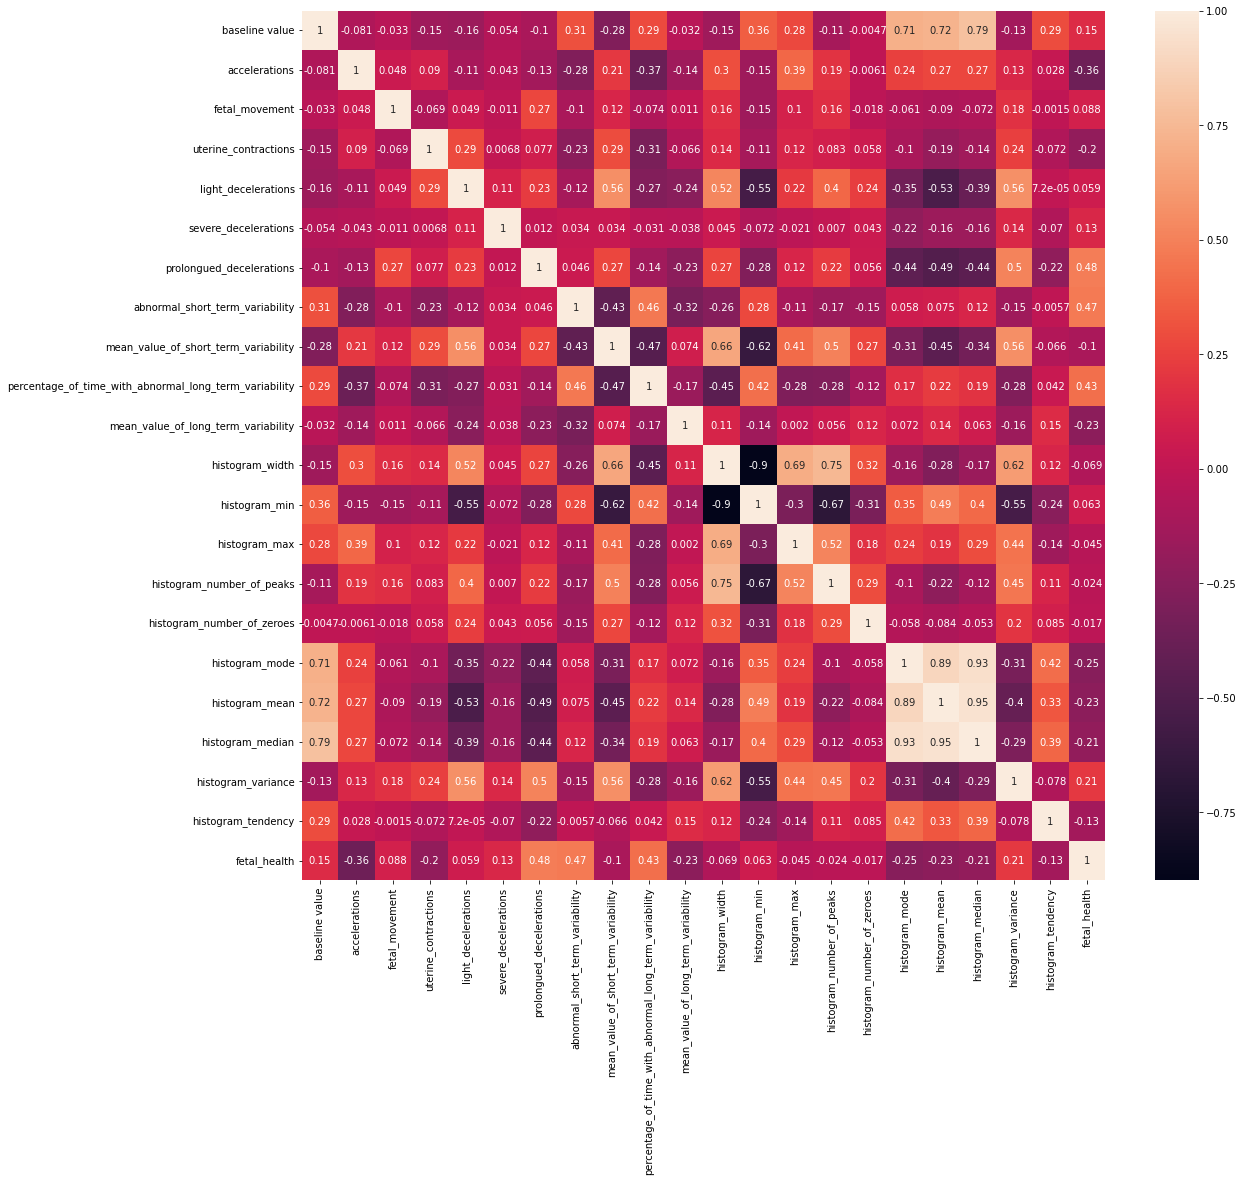

In [14]:
plt.figure(figsize = (18,16))
hcorr = df.corr()
hcorr.style.background_gradient()
sns.heatmap(hcorr, annot=True)
plt.show()

### Comparing Classifiers

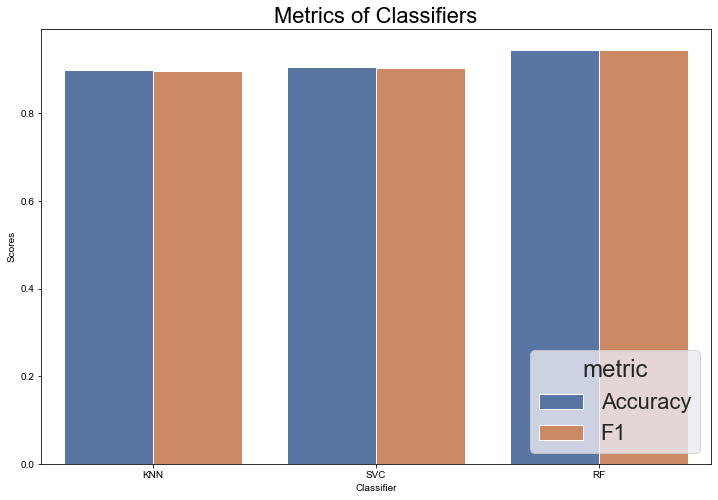

In [15]:
df2 = pd.DataFrame({
    "metric": ["Accuracy", "F1","Accuracy", "F1","Accuracy", "F1"],
    "Scores": [knn_acc_score,knn_score,svc_acc_score,svc_score,rf_acc_score,rf_score],
    "Classifier": ["KNN","KNN","SVC","SVC","RF","RF"],
})
plt.figure(figsize = (12, 8))
plt.title("Metrics of Classifiers", fontsize = 22)
sns.set_style("darkgrid")
sns.set(font_scale = 2)
p = sns.barplot(x = "Classifier", y = "Scores", hue = "metric", data = df2)
sns.move_legend(p, "lower right")